# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2023

Мягкий дедлайн: 24.12.2023 23:59 MSK

Жёсткий дедлайн: 24.12.2023 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

**   **
**   **
**Мой подсчет баллов: 10,5 баллов**

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [1]:
import os
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/gdrive')
os.chdir("/gdrive/MyDrive/1.1_Машинное_обучение/homework-practice-06-boosting/")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [3]:
x = load_npz('x.npz')
y = np.load('y.npy')

In [4]:
print(np.unique(y))

[-1  1]


Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [6]:
%load_ext autoreload

In [7]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [8]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)
#%time boosting.fit(x_train, y_train, eval_set=(x_valid, y_valid))
#%time boosting.fit(x_train, y_train)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 2.25 s, sys: 11.6 ms, total: 2.27 s
Wall time: 2.85 s
Train ROC-AUC 0.9892
Valid ROC-AUC 0.9149
Test ROC-AUC 0.9222


## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

Depth: 1, Train ROC-AUC: 0.8507451706012101, Test ROC-AUC: 0.8363072979564588
Depth: 3, Train ROC-AUC: 0.9378949214693355, Test ROC-AUC: 0.918098935166889
Depth: 5, Train ROC-AUC: 0.9560221912133644, Test ROC-AUC: 0.9279423040891291
Depth: 7, Train ROC-AUC: 0.9680553790304226, Test ROC-AUC: 0.9319202737107616
Depth: 9, Train ROC-AUC: 0.9743176469066979, Test ROC-AUC: 0.9336392320857535
Depth: 11, Train ROC-AUC: 0.9794825737490981, Test ROC-AUC: 0.9334695799081438
Depth: 13, Train ROC-AUC: 0.9833395579383781, Test ROC-AUC: 0.9236494348338825
Depth: 15, Train ROC-AUC: 0.9848707536956793, Test ROC-AUC: 0.924540994421553
Depth: 17, Train ROC-AUC: 0.9864604416297713, Test ROC-AUC: 0.919179040910186
Depth: 19, Train ROC-AUC: 0.9873754809084438, Test ROC-AUC: 0.9249460340752894
Depth: 21, Train ROC-AUC: 0.9882758459537324, Test ROC-AUC: 0.9205213005984667
Depth: 23, Train ROC-AUC: 0.9884410784421105, Test ROC-AUC: 0.9174030069766015
Depth: 25, Train ROC-AUC: 0.9894247298445712, Test ROC-AUC: 

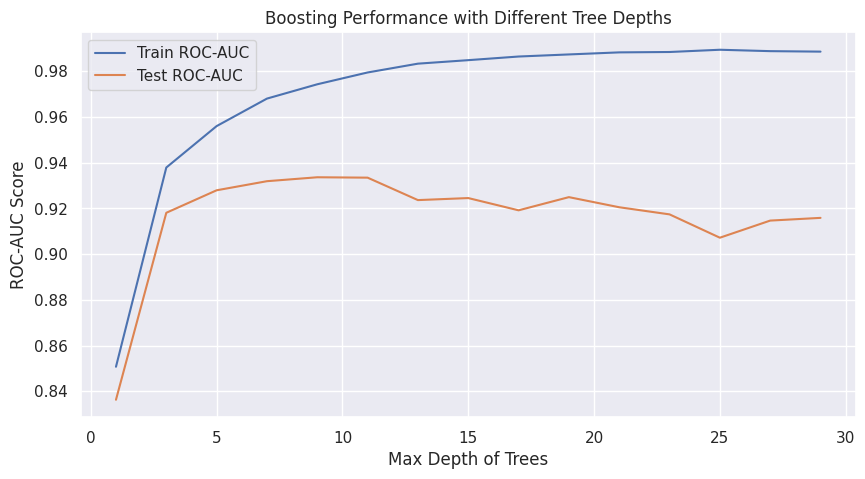

In [10]:
results = {'train': [], 'test': []}

depths = range(1, 30, 2)

for depth in depths:
    # Инициализируем бустинг
    boosting = Boosting(base_model_params={'max_depth': depth})

    # Обучаем бустинг
    boosting.fit(x_train, y_train, x_valid, y_valid)

    # Оцениваем качество на обучающей выборке
    train_score = boosting.score(x_train, y_train)
    # Оцениваем качество на тестовой выборке
    test_score = boosting.score(x_test, y_test)

    # Добавляем результаты в словарь
    results['train'].append(train_score)
    results['test'].append(test_score)

    # Выводим результаты
    print(f"Depth: {depth}, Train ROC-AUC: {train_score}, Test ROC-AUC: {test_score}")

# Строим график
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(depths, results['train'], label='Train ROC-AUC')
plt.plot(depths, results['test'], label='Test ROC-AUC')
plt.xlabel('Max Depth of Trees')
plt.ylabel('ROC-AUC Score')
plt.title('Boosting Performance with Different Tree Depths')
plt.legend()
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

**Ответ:** Модель с максимальной глубиной 7 показывает самое высокое значение ROC-AUC на тестовой выборке (0.9326). Это самая оптимальная модель. Поскольку после этой глубины значение ROC-AUC на тестовой выборке падает, несмотря на увеличение ROC-AUC на обучающей выборке. Это говорит о том, что модель переобучается, то есть она лучше подстраивается под данные обучающей выборки, но при этом теряет обобщающую способность.

При этом модели с меньшей глубиной показывают меньшее переобучение потому что у них меньшая разница в метрике ROC-AUC, но и качество ниже чем у модели с глубиной 7.


## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

In [13]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

# Перебираемые параметры
space = {
    'n_estimators': hp.choice('n_estimators', range(5, 100)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'early_stopping_rounds': hp.choice('early_stopping_rounds', range(5, 20)),
    'base_model_params': {
        'max_depth': hp.choice('max_depth', range(1, 11)),
        'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 11)),
    }
}

# Функция, определяющая, как модель будет обучаться и валидироваться
def objective(params):
    clf = Boosting(**params)
    clf.fit(x_train, y_train, x_valid, y_valid)
    score = clf.score(x_valid, y_valid)
    # Hyperopt минимизирует функцию objective, поэтому возвращается loss
    return {'loss': -score, 'status': STATUS_OK}

# Запустить поиск
trials = Trials()
best_params = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials
)

print("Лучшие гиперпараметры:", best_params)

Early stopping: stop training at iteration 68/78, best iteration was 55 with validation loss 0.3049.
Early stopping: stop training at iteration 57/99, best iteration was 41 with validation loss 0.3027.
Early stopping: stop training at iteration 39/41, best iteration was 25 with validation loss 0.3154.
Early stopping: stop training at iteration 60/87, best iteration was 45 with validation loss 0.3030.
Early stopping: stop training at iteration 52/75, best iteration was 44 with validation loss 0.2999.
Early stopping: stop training at iteration 74/94, best iteration was 64 with validation loss 0.2988.
Early stopping: stop training at iteration 56/58, best iteration was 40 with validation loss 0.3029.
Early stopping: stop training at iteration 45/97, best iteration was 39 with validation loss 0.3059.
Early stopping: stop training at iteration 60/81, best iteration was 48 with validation loss 0.3075.
Early stopping: stop training at iteration 55/89, best iteration was 48 with validation los

## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

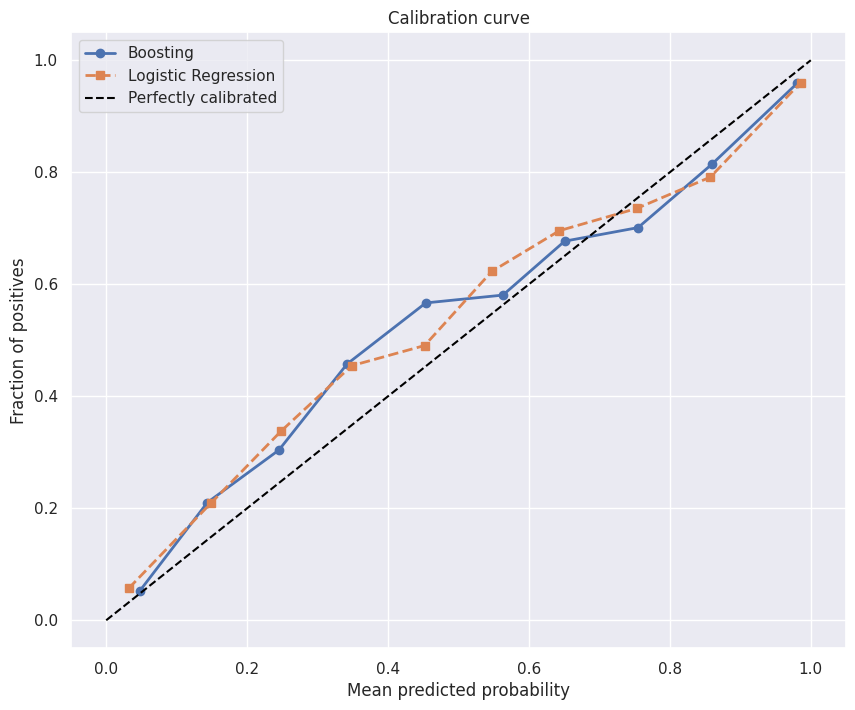

Brier score for Boosting: 0.0913
Brier score for Logistic Regression: 0.0909


In [19]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import brier_score_loss

# Построение модели бустинга с лучшими параметрами
boosting_best = Boosting(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    early_stopping_rounds=best_params['early_stopping_rounds'],
    base_model_params={
        'max_depth': best_params['max_depth'],
        'min_samples_leaf': best_params['min_samples_leaf']
    }
)

boosting_best.fit(x_train, y_train, x_valid, y_valid)

# Сохранение предсказанных вероятностей
y_proba_boosting = boosting_best.predict_proba(x_valid)[:, 1]

# Чтобы посчитать калибровочную кривую:
prob_true, prob_pred = calibration_curve(y_valid, y_proba_boosting, n_bins=10, normalize=True)

# Оценка калибровки (меньше -- лучше)
brier_score = brier_score_loss(y_valid, y_proba_boosting)

# Построение логистической регрессии для сравнения
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_proba_log_reg = log_reg.predict_proba(x_valid)[:, 1]
prob_true_log, prob_pred_log = calibration_curve(y_valid, y_proba_log_reg, n_bins=10)

# Визуализация калибровочных кривых
plt.figure(figsize=(10, 8))
plt.plot(prob_pred, prob_true, marker='o', label='Boosting', linewidth=2)
plt.plot(prob_pred_log, prob_true_log, marker='s', linestyle='--', label='Logistic Regression', linewidth=2)
# Прямая, соответствующая идеальной калибровке
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Perfectly calibrated')
plt.title('Calibration curve')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.legend()
plt.grid(True)
plt.show()

print(f"Brier score for Boosting: {brier_score:.4f}")
print(f"Brier score for Logistic Regression: {brier_score_loss(y_valid, y_proba_log_reg):.4f}")

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

In [ ]:
# YOUR CODE:

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [ ]:
# YOUR CODE:

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Разбиваем валидационную выборку на две части для блендинга
x_blend_train, x_blend_valid, y_blend_train, y_blend_valid = train_test_split(x_valid, y_valid, test_size=0.5, random_state=42)

# Обучаем лучшую модель бустинга на первой части
boosting_best.fit(x_train, y_train, x_blend_train, y_blend_train)

# Обучаем логистическую регрессию на первой части
log_reg.fit(x_train, y_train)

# Получаем предсказания на второй части валидационной выборки для каждой модели
blending_predictions_boosting = boosting_best.predict_proba(x_blend_valid)[:,1]
blending_predictions_log_reg = log_reg.predict_proba(x_blend_valid)[:,1]

# Смешивание предсказаний с определенными весами
weights = [0.5, 0.5]
blending_predictions = weights[0] * blending_predictions_boosting + weights[1] * blending_predictions_log_reg

# Вычисляем ROC AUC для блендинга
blending_score = roc_auc_score(y_blend_valid, blending_predictions)
print(f"Blending ROC AUC: {blending_score:.4f}")

# Сравнение с качеством моделей по отдельности на той же части валидационной выборки
boosting_score = roc_auc_score(y_blend_valid, blending_predictions_boosting)
log_reg_score = roc_auc_score(y_blend_valid, blending_predictions_log_reg)

print(f"Boosting ROC AUC: {boosting_score:.4f}")
print(f"Logistic Regression ROC AUC: {log_reg_score:.4f}")

Early stopping: stop training at iteration 52/54, best iteration was 47 with validation loss 0.3070.
Blending ROC AUC: 0.9470
Boosting ROC AUC: 0.9436
Logistic Regression ROC AUC: 0.9463


**Ответ:** Качество на модели после блендинга немного улучшилось - до 0.9470
Хоть улучшение совсем небольшое, но иногда это может быть важно.

## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [ ]:
!pip install catboost

In [22]:
import catboost as cb
from sklearn.metrics import roc_auc_score

catboost_model = cb.CatBoostClassifier(iterations=1000,
                                       learning_rate=0.1,
                                       depth=3,
                                       verbose=100,
                                       eval_metric='AUC')


# Обучаем модель CatBoost
catboost_model.fit(x_train, y_train, eval_set=(x_valid, y_valid), use_best_model=True)

# Получаем предсказанные вероятности
y_proba_catboost = catboost_model.predict_proba(x_valid)[:, 1]

# AUC для CatBoost
auc_catboost = roc_auc_score(y_valid, y_proba_catboost)
print(f'CatBoost ROC AUC: {auc_catboost:.4f}')

# Сравниваем результаты
boosting_best.fit(x_train, y_train, x_valid, y_valid)
y_proba_boosting = boosting_best.predict_proba(x_valid)[:, 1]
auc_boosting = roc_auc_score(y_valid, y_proba_boosting)
print(f'Your Boosting ROC AUC: {auc_boosting:.4f}')

0:	test: 0.8814247	best: 0.8814247 (0)	total: 5.16ms	remaining: 5.16s
100:	test: 0.9431912	best: 0.9431912 (100)	total: 490ms	remaining: 4.36s
200:	test: 0.9464210	best: 0.9464210 (200)	total: 956ms	remaining: 3.8s
300:	test: 0.9474595	best: 0.9474595 (300)	total: 1.47s	remaining: 3.4s
400:	test: 0.9475636	best: 0.9476028 (391)	total: 2.6s	remaining: 3.88s
500:	test: 0.9476898	best: 0.9477696 (474)	total: 3.64s	remaining: 3.63s
600:	test: 0.9477093	best: 0.9478334 (545)	total: 4.76s	remaining: 3.16s
700:	test: 0.9476574	best: 0.9478334 (545)	total: 5.77s	remaining: 2.46s
800:	test: 0.9476303	best: 0.9478334 (545)	total: 6.65s	remaining: 1.65s
900:	test: 0.9477013	best: 0.9478334 (545)	total: 7.13s	remaining: 783ms
999:	test: 0.9477500	best: 0.9478334 (545)	total: 7.59s	remaining: 0us

bestTest = 0.9478334303
bestIteration = 545

Shrink model to first 546 iterations.
CatBoost ROC AUC: 0.9478
Your Boosting ROC AUC: 0.9420


**Ответ:** Результаты Catboost еще лучше - 0.9478

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2024 года?

**Ответ:** Ждем новых крутых открытий, впечатлений, хороших оценок и веселых друзей.

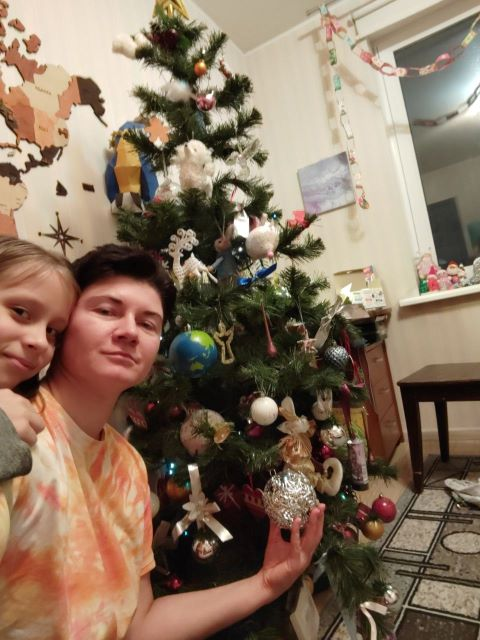

In [18]:
import PIL
PIL.Image.open("cristmas_tree.jpg")